## EDA for Final Project- Endangered Langauges
Jordan Andersen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
os.chdir('/workspace')

### Dataframe exploration

In [2]:
## Read csv

df = pd.read_csv('Project/datasci207-final-project/Data Cleaning/final_dataset.csv')
df.head()

,Unnamed: 0,official_name,level,speakers,country,missing_speakers,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use,years_since_obs
0,0,!Xun,Vulnerable,18000,South Africa;Namibia;Angola,0,0,0,0,0,0,3,68.819,75.7,1.0
1,1,'Ôrôê,Endangered,590,New Caledonia,0,0,0,0,0,0,1,72.719,82.0,7.0
2,2,(Lower) Tanana,Critically Endangered,25,United States,0,0,0,0,0,0,1,83.298,93.1,1.0
3,3,A'ingae,Vulnerable,1500,Colombia;Ecuador,0,0,0,0,0,0,2,82.354,77.3,1.0
4,4,Aasáx,Dormant,0,Tanzania,0,0,0,0,0,0,1,37.409,29.1,1.0


In [3]:
# Column names
print(f'Columns: {df.columns}\n')

# Df shape
print(f'Shape of dataframe: {df.shape}')

Columns: Index(['Unnamed: 0', 'official_name', 'level', 'speakers', 'country',
       'missing_speakers', 'official', 'regional', 'minority', 'national',
       'widely_spoken', 'country_count', 'max_urbanization',
       'max_internet_use', 'years_since_obs'],
      dtype='object')

Shape of dataframe: (3184, 15)


In [4]:
# Drop unnamed index column
df = df.drop('Unnamed: 0', axis= 1)
df.head()

,official_name,level,speakers,country,missing_speakers,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use,years_since_obs
0,!Xun,Vulnerable,18000,South Africa;Namibia;Angola,0,0,0,0,0,0,3,68.819,75.7,1.0
1,'Ôrôê,Endangered,590,New Caledonia,0,0,0,0,0,0,1,72.719,82.0,7.0
2,(Lower) Tanana,Critically Endangered,25,United States,0,0,0,0,0,0,1,83.298,93.1,1.0
3,A'ingae,Vulnerable,1500,Colombia;Ecuador,0,0,0,0,0,0,2,82.354,77.3,1.0
4,Aasáx,Dormant,0,Tanzania,0,0,0,0,0,0,1,37.409,29.1,1.0


In [5]:
# Unique values
print(f'Unique values in level column: {df['level'].unique()}')

Unique values in level column: ['Vulnerable' 'Endangered' 'Critically Endangered' 'Dormant' 'Threatened'
 'Severely Endangered' 'At risk' 'Awakening' 'Not Endangered']


In [6]:
# Counts in language recognition columns

print(f' There are {sum(df['official'] == True)} languages with "Official language status"\n')

print(f' There are {sum(df['regional'] == True)} languages with "Regional language status"\n')

print(f' There are {sum(df['minority'] == True)} languages with "Minority language status"\n')

print(f' There are {sum(df['national'] == True)} languages with "National language status"\n')

print(f' There are {sum(df['widely_spoken'] == True)} languages that are widely spoken"\n')

 There are 52 languages with "Official language status"

 There are 55 languages with "Regional language status"

 There are 41 languages with "Minority language status"

 There are 38 languages with "National language status"

 There are 24 languages that are widely spoken"



In [7]:
# Counts in level column

df.groupby('level').size()

level
At risk                   82
Awakening                 70
Critically Endangered    397
Dormant                  173
Endangered               706
Not Endangered            33
Severely Endangered      350
Threatened               869
Vulnerable               504
dtype: int64

In [8]:
# Speaker count minimum and maximum

print(f'Lowest speaker count: {df['speakers'].min()}\n')

print(f'Highest speaker count: {df['speakers'].max()}')

Lowest speaker count: 0

Highest speaker count: 2920000


In [9]:
# Are the low speaker count countries the dormant languages?

df[df['speakers'] == 0]['level'].unique()

array(['Dormant', 'Awakening', 'Critically Endangered', 'Vulnerable'],
      dtype=object)

There might be some mismatch here to look into. If there are 0 speakers, it should probably all be dormant. I could see how it maybe could be "awakening" if it's starting to be taught again but no one is considered "fluent" yet. But it probably shouldn't be considered Critically Endangered or Vulnerable.

### Count of languages in each level of endangerment

**Question:** How many languages are in each level of endangerment or non-endangerment?

The plot below shows the number of languages categorized by each level of endangerment. The majority of our dataset is made up of threatened, vulnerable, and endangered languages. There are significantly fewer non-endangered, dormant, at risk and awakening languages. A model might struggle to predict these categories since they are underrepresented in the data. Binning them into a larger category might be helpful. The low count of non-endangered languages is expected based on the literature, which states that the majority of the 7,000 languages in the world are spoken by a small minority of the global population. From this, we would expect to see that there are fewer non-endangered languages. 

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Vulnerable'),
  Text(1, 0, 'Endangered'),
  Text(2, 0, 'Critically Endangered'),
  Text(3, 0, 'Dormant'),
  Text(4, 0, 'Threatened'),
  Text(5, 0, 'Severely Endangered'),
  Text(6, 0, 'At risk'),
  Text(7, 0, 'Awakening'),
  Text(8, 0, 'Not Endangered')])

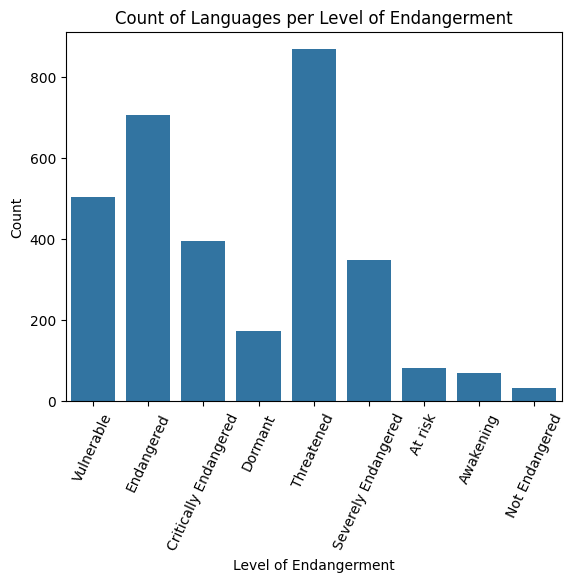

In [10]:
sns.countplot(data= df, x= 'level')
plt.title('Count of Languages per Level of Endangerment')
plt.xlabel('Level of Endangerment')
plt.ylabel('Count')
plt.xticks(rotation= 65)

### Language status across endangerment types

**Question:** In each level of endangermment, how many of those languages hold political recognition?

The first thing to note in this plot is the y-axis, which only reaches 17.5, a small count compared to the next plot which will show the number of languages without political recognition. This tells us that languages with some level of recognition are already a relatively small subset in our data, whehter they are endangered or not. 

Interestingly, there are four dormant languages (no longer spoken) listed as official languages. Upon further exploration, we find that all four belong to Bolivia, which lists any language spoken within the country as an official language. However, these langauges are listed as dormant because the native tribes who speak them have not been able to be contacted recently. 

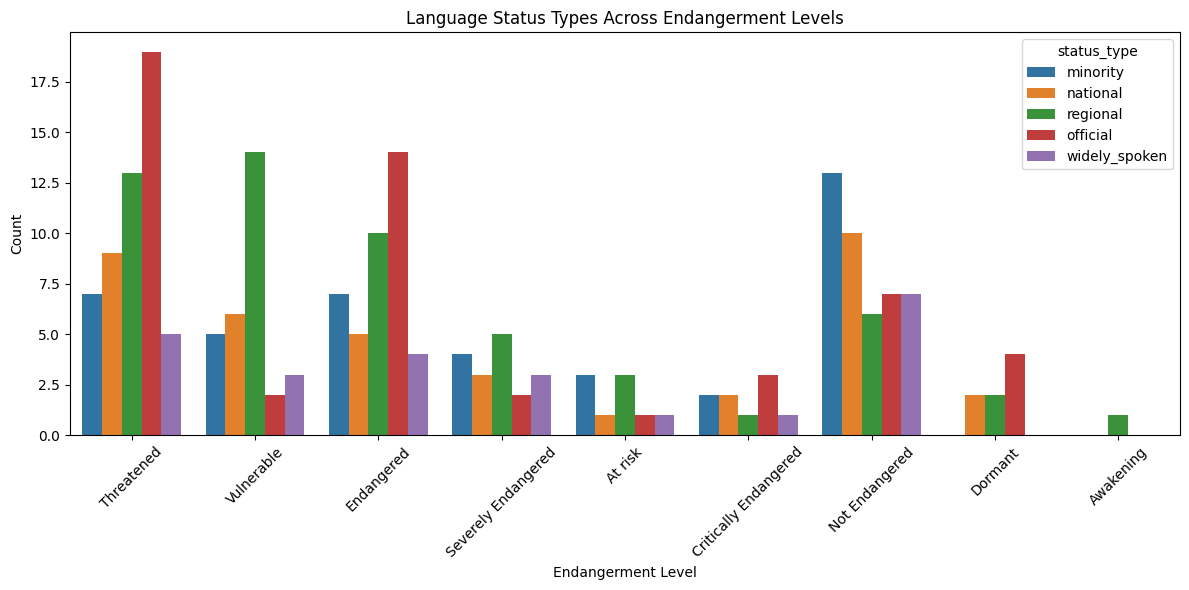

In [11]:
# Melt to long format
df_melted = df.melt(id_vars='level', value_vars=['minority', 'national', 'regional', 'official', 'widely_spoken'],
                    var_name='status_type', value_name='status_value')

# Filter only where status is True
df_filtered = df_melted[df_melted['status_value'] == True]

# Plot status/level count
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='level', hue='status_type')
plt.xticks(rotation=45)
plt.title('Language Status Types Across Endangerment Levels')
plt.xlabel('Endangerment Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [12]:
# Which is the country with a national language as a dormant langauge?

df[(df['level'] == 'Dormant') & (df['official'] == True)]['official_name']

484     Canichana
1499         Leco
2713     Toromona
3032     Yaminawa
Name: official_name, dtype: object

### Languages without recognized political status

**Question:** How many languages lack any form of political recognition?

The plot below uses a larger y-axis scale to reflect the substantial number of languages that have no official political status in the countries where they are spoken. Languages classified as threatened or endangered account for the highest counts of unrecognized status, while non-endangered languages make up the smallest portion. This pattern aligns with existing literature, which suggests that endangered and threatened languages constitute the majority of the world’s linguistic diversity. Importantly, political recognition is used here as a proxy for language vitality—highlighting the role that institutional support may play in a language’s long-term survival.

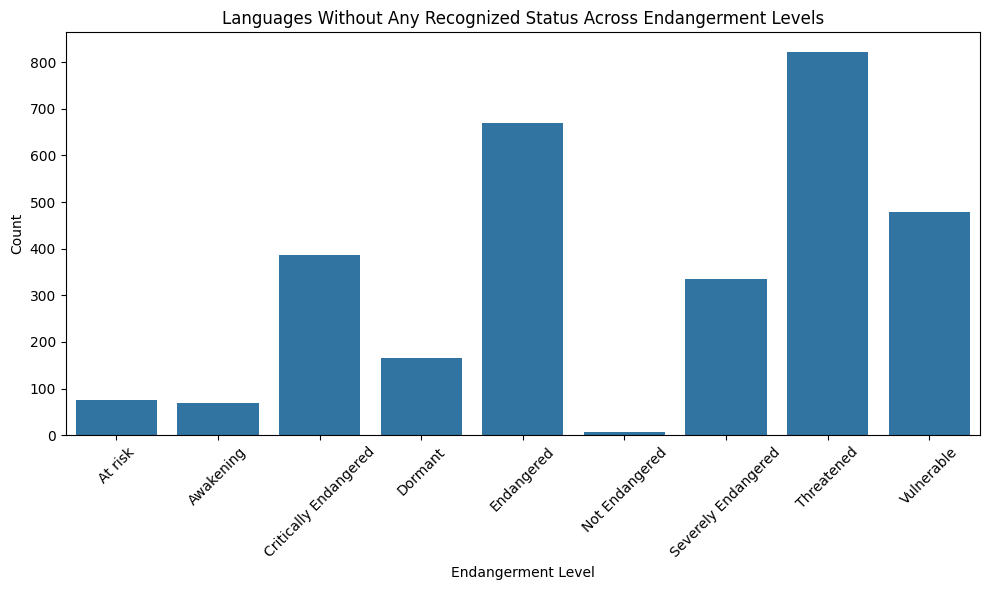

In [13]:
# Create a mask for rows where all status columns are False
status_cols = ['minority', 'national', 'regional', 'official', 'widely_spoken']
no_status_mask = ~(df[status_cols].any(axis=1))

df_no_status = df[no_status_mask]

# Plot the count of languages with no status by endangerment level
plt.figure(figsize=(10, 6))
sns.countplot(data=df_no_status, x='level', order=sorted(df_no_status['level'].unique()))
plt.xticks(rotation=45)
plt.title('Languages Without Any Recognized Status Across Endangerment Levels')
plt.xlabel('Endangerment Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Distribution of speaker counts by endangerment level

**Question:** How does the number of speakers vary across different levels of language endangerment?

The boxplot illustrates the distribution of speaker counts by language endangerment level, using a logarithmic scale to capture the wide range of values. Interestingly, Vulnerable, Threatened, and At Risk languages show some of the highest median speaker counts, with distributions spanning several orders of magnitude and many high outliers. This could be due to their disproportionate representation within the dataset. In contrast, Critically Endangered, Dormant, and Severely Endangered languages tend to have much lower medians. 

Not Endangered languages actually have a relatively low median speaker count in this dataset. This could be a symptom of their low representation in the dataset, but also could be suggestive that political or institutional recognition may not always align with population size. The plot highlights how speaker count alone is not a definitive indicator of language vitality and emphasizes the importance of considering both quantitative and social factors in language endangerment.

/usr/local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/tmp/ipykernel_1179/2715220190.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


Text(0, 0.5, 'Number of Speakers (Log Scale)')

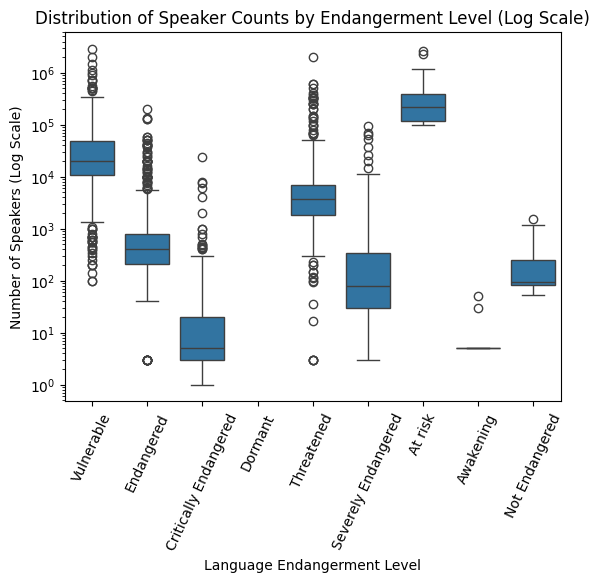

In [14]:
ax = sns.boxplot(data= df, x= 'level', y= 'speakers', log_scale= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title('Distribution of Speaker Counts by Endangerment Level (Log Scale)')
plt.xlabel('Language Endangerment Level')
plt.ylabel('Number of Speakers (Log Scale)')

### Distribution of country counts by endangerment level

**Question:** How geographically widespread are languages across different levels of endangerment?

This boxplot shows the distribution of the number of countries in which languages are spoken, grouped by their endangerment level. Languages classified as Not Endangered are the most geographically widespread, with a median presence in significantly more countries than any other group, and outliers reaching up to around 90 countries. 

In contrast, the vast majority of endangered languages—especially those labeled Critically Endangered, Dormant, or Severely Endangered—are spoken in only one or a few countries. Vulnerable and Threatened languages also tend to be relatively localized. This suggests that languages with broader geographic reach are less likely to be endangered. The extreme localization of most endangered languages may make them more susceptible to endangerment and extinction.

/tmp/ipykernel_1179/2430994585.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


Text(0, 0.5, 'Number of Countries where Spoken')

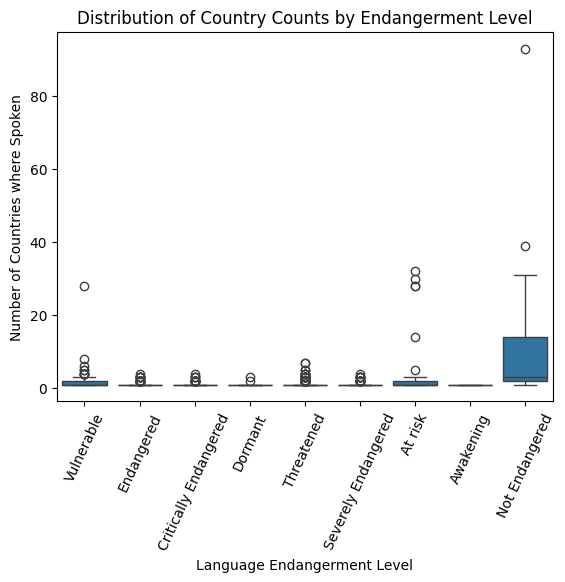

In [15]:
ax = sns.boxplot(data= df, x= 'level', y= 'country_count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title('Distribution of Country Counts by Endangerment Level')
plt.xlabel('Language Endangerment Level')
plt.ylabel('Number of Countries where Spoken')